# Pneumonia Detection using Deep Learning

This project aims to develop a deep learning model for detecting pneumonia from chest X-ray images. Using a convolutional neural network (CNN), the model is trained on a dataset of X-ray images labeled as either "normal" or "pneumonia." The goal is to achieve high accuracy in classifying X-rays, assisting in the early and efficient diagnosis of pneumonia.

**Project Workflow:**

1. **Data Collection and Preprocessing:** Obtain a dataset of chest X-ray images, preprocess them (resizing, normalization), and split them into training and testing sets.
2. **Model Development:** Design and implement a CNN architecture suitable for image classification.
3. **Model Training:** Train the CNN model using the training dataset, optimizing its parameters to minimize classification error.
4. **Model Evaluation:** Assess the model's performance on the testing dataset using metrics like accuracy, precision, and recall.
5. **Visualization and Interpretation:** Visualize the model's predictions and interpret its learned features to gain insights into the classification process.
6. **Model Deployment (Optional):** Deploy the trained model for practical use, potentially integrating it into a web application or clinical workflow.

**Expected Outcomes:**

- A trained deep learning model capable of accurately classifying chest X-ray images as pneumonia or normal.
- Evaluation metrics demonstrating the model's performance on unseen data.
- Visualizations and interpretations that provide insights into the model's decision-making process.

**Potential Benefits:**

- Early and efficient pneumonia detection, leading to timely treatment and improved patient outcomes.
- Reduced workload for radiologists, allowing them to focus on more complex cases.
- Potential for integration into clinical workflows for automated pneumonia screening.

# **Import necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Define data directories**

In [5]:
train_data_dir = "/content/drive/MyDrive/Dataset/xray_dataset_covid19/train"
test_data_dir = "/content/drive/MyDrive/Dataset/xray_dataset_covid19/test"

# **Create TensorFlow Datasets**

In [8]:
# Create TensorFlow Datasets
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',  # Infers labels from directory structure
    label_mode='categorical',  # Use 'binary' for two classes
    image_size=(224, 224),  # Adjust to your image size
    batch_size=32,  # Adjust as needed
    shuffle=True  # Shuffle the data for training
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False  # No need to shuffle test data
)

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [11]:
def preprocess(image, label):
    #Rescales pixel values to [0, 1].

    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = image / 255.0  # Rescale to [0, 1]
    return image, label

 a preprocessing function that is applied to each image in the dataset. It converts the image to a TensorFlow tensor and rescales the pixel values to a range of [0, 1] for better model training.

In [12]:
# Apply preprocessing to the datasets
train_data = train_data.map(preprocess)
test_data = test_data.map(preprocess)

# **Model Building**

In [13]:
model = keras.Sequential([
       keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
       keras.layers.MaxPooling2D((2, 2)),
       keras.layers.Conv2D(64, (3, 3), activation='relu'),
       keras.layers.MaxPooling2D((2, 2)),
       keras.layers.Flatten(),
       keras.layers.Dense(2, activation='sigmoid')  # 2 units for binary classification
   ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Summary**

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       373,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,642 (1.50 MB)

 Trainable params: 392,642 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Model Training**

In [16]:
history=model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.6682 - loss: 1.8937 - val_accuracy: 0.5000 - val_loss: 0.8801
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5983 - loss: 0.7849 - val_accuracy: 0.9750 - val_loss: 0.3651
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9160 - loss: 0.4218 - val_accuracy: 0.9750 - val_loss: 0.2226
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9551 - loss: 0.2876 - val_accuracy: 0.9750 - val_loss: 0.1014
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9670 - loss: 0.1790 - val_accuracy: 1.0000 - val_loss: 0.0440
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9559 - loss: 0.1321 - val_accuracy: 1.0000 - val_loss: 0.0253
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.9853 - loss: 0.0880 - val_accuracy: 1.0000 - val_loss: 0.0263
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9736 - loss: 0.0924 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 9/

# **Loss & Accuracy**

In [17]:
loss,accuracy=model.evaluate(test_data)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print(f"Test loss: {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 1.0000 - loss: 0.0113
Test accuracy: 100.00%
Test loss: 0.01


# **Plotting Loss & Accuracy**

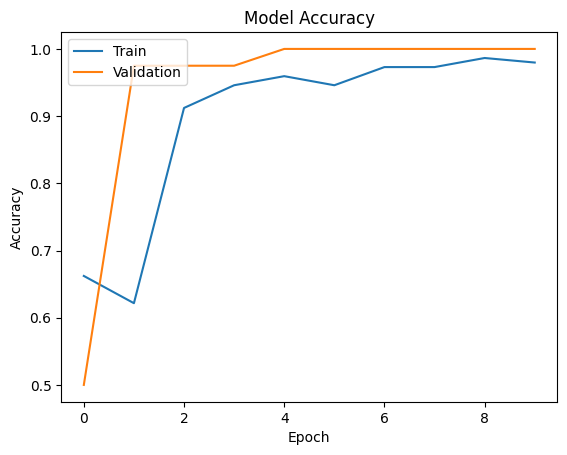

In [18]:
#accuracy vs epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

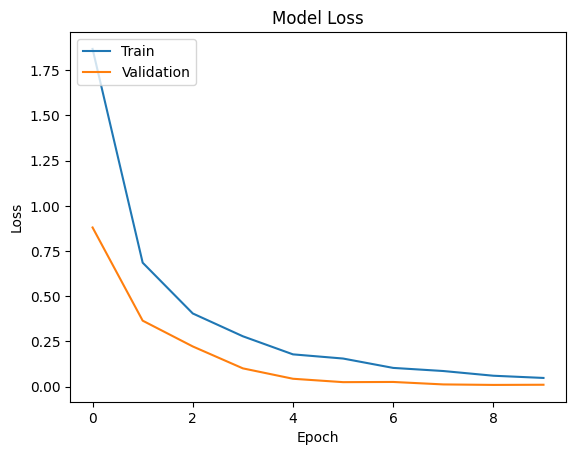

In [19]:
#loss vs epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [20]:
model_pred=model.predict(test_data)
model_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step


array([[9.9489057e-01, 6.6587944e-03],
       [9.9341291e-01, 7.7722273e-03],
       [9.7191250e-01, 2.7420267e-02],
       [9.9908960e-01, 9.9853321e-04],
       [9.9099672e-01, 1.5833031e-02],
       [8.6290765e-01, 1.8433587e-01],
       [9.9622601e-01, 7.3074056e-03],
       [9.9974084e-01, 5.3925667e-04],
       [9.4873959e-01, 3.3870794e-02],
       [9.8644769e-01, 2.5317302e-02],
       [9.9879903e-01, 1.1743651e-03],
       [9.9905884e-01, 1.4345576e-03],
       [9.8764676e-01, 1.4378794e-02],
       [9.9364233e-01, 1.4293557e-02],
       [9.9740905e-01, 1.3908556e-03],
       [9.9793965e-01, 3.4947058e-03],
       [9.9838996e-01, 3.5493709e-03],
       [9.9246776e-01, 1.3739400e-02],
       [9.9904382e-01, 1.6517367e-03],
       [9.9636364e-01, 7.9350406e-03],
       [3.9271701e-05, 9.9999100e-01],
       [6.9840456e-04, 9.9982566e-01],
       [1.2223670e-03, 9.9981385e-01],
       [1.2594343e-02, 9.9507052e-01],
       [3.2324519e-03, 9.9860698e-01],
       [1.9847911e-03, 9.

# **Prediction on test Data**

In [22]:
class_names=['NORMAL','PNEUMONIA']

In [30]:
def plot_prediction(test_generator, n_images):
    # Convert the _MapDataset to an iterator using iter()
    test_generator = iter(test_generator)

    i = 0  # Start index at 0
    images, labels = next(test_generator)  # Get the next batch of data
    predictions = np.argmax(model.predict(images), axis=1)

    # Convert labels to numpy array before using astype
    labels = labels.numpy()
    labels = labels.astype('int32')  # Convert labels to int32

    # Assuming labels are one-hot encoded, convert to class indices
    labels = np.argmax(labels, axis=1)

    plt.figure(figsize=(14, 15))
    for image, label, prediction in zip(images, labels, predictions):  # Iterate through images, labels, and predictions
        plt.subplot(4, 3, i + 1)  # Add 1 to i for subplot indexing
        plt.imshow(image)
        if prediction == label:  # Compare prediction and label for the current image
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g')
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r')
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


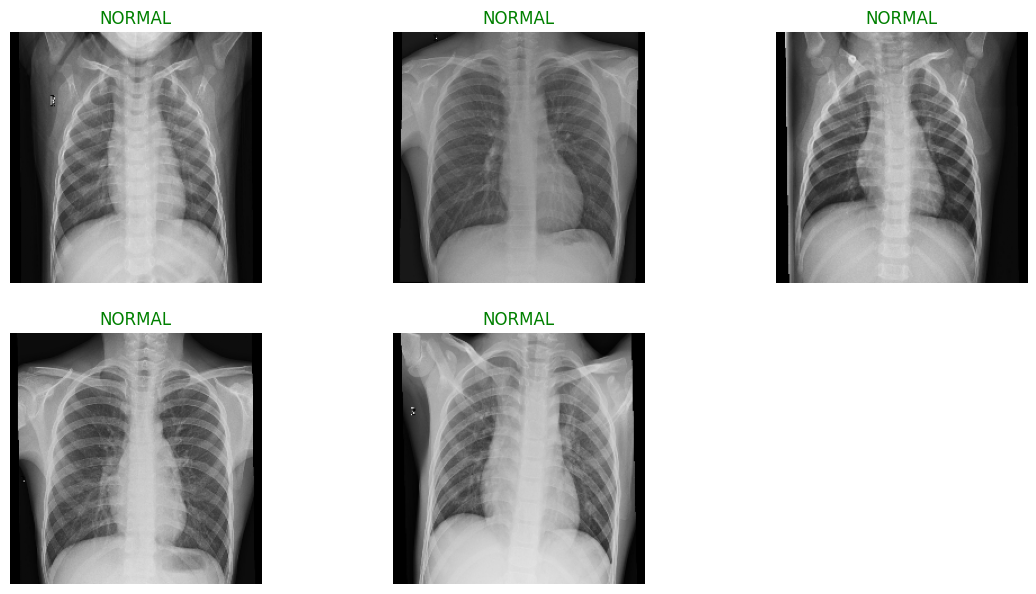

In [31]:
plot_prediction(test_data, 5)

* Green Color showing that modol predicting correct label

# Conclusion

The model achieved a excellent accuracy  on the test set. This indicates a strong ability to distinguish between normal and pneumonia cases based on chest X-ray images. While this is a promising result, further enhancements are possible.

## Future Work

Several avenues for improvement can be explored:

* **Model Architecture:** Experimenting with alternative Convolutional Neural Network (CNN) architectures, such as ResNet or DenseNet, could potentially enhance performance.
* **Data Augmentation:** Applying data augmentation techniques, like rotations, flips, and zooms, can artificially increase the training dataset size and improve model robustness.
* **Hyperparameter Tuning:** Fine-tuning hyperparameters, including learning rate and batch size, can further optimize the model's learning process.

## Model Deployment (Optional)

The trained model can be saved for later use or deployment: